In [28]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd

In [2]:
def PlotMap(data,year=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 0.0  # Minimum value for the color scale
    vmax = 10.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Average Yearly Rainfall Data of {year} from June to September')

In [3]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]

#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 1\IndianRainfall_JJAS_Zone1_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 2\IndianRainfall_JJAS_Zone2_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 3\IndianRainfall_JJAS_Zone3_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 4\IndianRainfall_JJAS_Zone4_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 5\IndianRainfall_JJAS_Zone5_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 6\IndianRainfall_JJAS_Zone6_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))


# PlotMap(zone1[0].to_array()[0])
# PlotMap(zone2[0].to_array()[0])
# PlotMap(zone3[0].to_array()[0])
# PlotMap(zone4[0].to_array()[0])
# PlotMap(zone5[0].to_array()[0])
# PlotMap(zone6[0].to_array()[0])

In [4]:
zone1[0]

<xarray.Dataset>
Dimensions:                        (lat: 129, lon: 135)
Coordinates:
  * lat                            (lat) float64 6.5 6.75 7.0 ... 38.25 38.5
  * lon                            (lon) float64 66.5 66.75 67.0 ... 99.75 100.0
Data variables:
    __xarray_dataarray_variable__  (lat, lon) float64 ...

In [5]:
#Find the climatological mean i.e a mean of 
combined_data_zone1 = xarray.concat(zone1, dim='years')
mean_zone1_map = combined_data_zone1['__xarray_dataarray_variable__'].mean(dim='years')
zone1_mean_number = mean_zone1_map.mean()

combined_data_zone2 = xarray.concat(zone2, dim='years')
mean_zone2_map = combined_data_zone2['__xarray_dataarray_variable__'].mean(dim='years')
zone2_mean_number = mean_zone2_map.mean()

combined_data_zone3 = xarray.concat(zone3, dim='years')
mean_zone3_map = combined_data_zone3['__xarray_dataarray_variable__'].mean(dim='years')
zone3_mean_number = mean_zone3_map.mean()

combined_data_zone4 = xarray.concat(zone4, dim='years')
mean_zone4_map = combined_data_zone4['__xarray_dataarray_variable__'].mean(dim='years')
zone4_mean_number = mean_zone4_map.mean()

combined_data_zone5 = xarray.concat(zone5, dim='years')
mean_zone5_map = combined_data_zone5['__xarray_dataarray_variable__'].mean(dim='years')
zone5_mean_number = mean_zone5_map.mean()

combined_data_zone6 = xarray.concat(zone6, dim='years')
mean_zone6_map = combined_data_zone6['__xarray_dataarray_variable__'].mean(dim='years')
zone6_mean_number = mean_zone6_map.mean()


fullMap_climatological_mean=mean_zone1_map.combine_first(mean_zone2_map.combine_first(mean_zone3_map.combine_first(mean_zone4_map.combine_first(mean_zone5_map.combine_first(mean_zone6_map)))))
PlotMap(fullMap_climatological_mean)
# PlotMap(mean_zone2_map)
# PlotMap(mean_zone3_map)
# PlotMap(mean_zone4_map)
# PlotMap(mean_zone5_map)
# PlotMap(mean_zone6_map)

print("Zone 1 mean : ",zone1_mean_number)
print("Zone 2 mean : ",zone2_mean_number)
print("Zone 3 mean : ",zone3_mean_number)
print("Zone 4 mean : ",zone4_mean_number)
print("Zone 5 mean : ",zone5_mean_number)
print("Zone 6 mean : ",zone6_mean_number)

Zone 1 mean :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(3.61295982)
Zone 2 mean :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(7.95324768)
Zone 3 mean :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(4.31085409)
Zone 4 mean :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(12.1609085)
Zone 5 mean :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(7.08052048)
Zone 6 mean :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(20.82007984)


Zone 1 Std :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(1.63251918)
Zone 2 Std :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(2.14686304)
Zone 3 Std :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(1.51962949)
Zone 4 Std :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(3.27248252)
Zone 5 Std :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(1.99403921)
Zone 6 Std :  <xarray.DataArray '__xarray_dataarray_variable__' ()>
array(5.39879521)


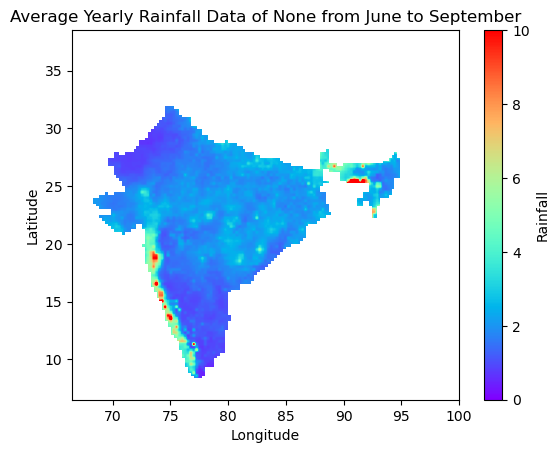

In [6]:
#Calculating the standard deviation
std_zone1_map = combined_data_zone1['__xarray_dataarray_variable__'].std(dim='years') 
std_zone1_number=std_zone1_map.mean()

std_zone2_map = combined_data_zone2['__xarray_dataarray_variable__'].std(dim='years') 
std_zone2_number=std_zone2_map.mean()

std_zone3_map = combined_data_zone3['__xarray_dataarray_variable__'].std(dim='years') 
std_zone3_number=std_zone3_map.mean()

std_zone4_map = combined_data_zone4['__xarray_dataarray_variable__'].std(dim='years') 
std_zone4_number=std_zone4_map.mean()

std_zone5_map = combined_data_zone5['__xarray_dataarray_variable__'].std(dim='years') 
std_zone5_number=std_zone5_map.mean()

std_zone6_map = combined_data_zone6['__xarray_dataarray_variable__'].std(dim='years') 
std_zone6_number=std_zone6_map.mean()


fullMap_climatological_std=std_zone1_map.combine_first(std_zone2_map.combine_first(std_zone3_map.combine_first(std_zone4_map.combine_first(std_zone5_map.combine_first(std_zone6_map)))))
PlotMap(fullMap_climatological_std)

print("Zone 1 Std : ",std_zone1_number)
print("Zone 2 Std : ",std_zone2_number)
print("Zone 3 Std : ",std_zone3_number)
print("Zone 4 Std : ",std_zone4_number)
print("Zone 5 Std : ",std_zone5_number)
print("Zone 6 Std : ",std_zone6_number)

In [7]:
#Finding each zone anomaly
zone1_anomaly_map=[]
zone2_anomaly_map=[]
zone3_anomaly_map=[]
zone4_anomaly_map=[]
zone5_anomaly_map=[]
zone6_anomaly_map=[]

zone1_anomaly_number=[]
zone2_anomaly_number=[]
zone3_anomaly_number=[]
zone4_anomaly_number=[]
zone5_anomaly_number=[]
zone6_anomaly_number=[]

for i in range(len(zone1)):
    zone1_anomaly_map.append(zone1[i]-mean_zone1_map)
    zone1_anomaly_number.append(zone1_anomaly_map[i].mean())

    zone2_anomaly_map.append(zone2[i]-mean_zone2_map)
    zone2_anomaly_number.append(zone2_anomaly_map[i].mean())

    zone3_anomaly_map.append(zone3[i]-mean_zone3_map)
    zone3_anomaly_number.append(zone3_anomaly_map[i].mean())
    
    zone4_anomaly_map.append(zone4[i]-mean_zone4_map)
    zone4_anomaly_number.append(zone4_anomaly_map[i].mean())
    
    zone5_anomaly_map.append(zone5[i]-mean_zone5_map)
    zone5_anomaly_number.append(zone5_anomaly_map[i].mean())
    
    zone6_anomaly_map.append(zone6[i]-mean_zone6_map)
    zone6_anomaly_number.append(zone6_anomaly_map[i].mean())


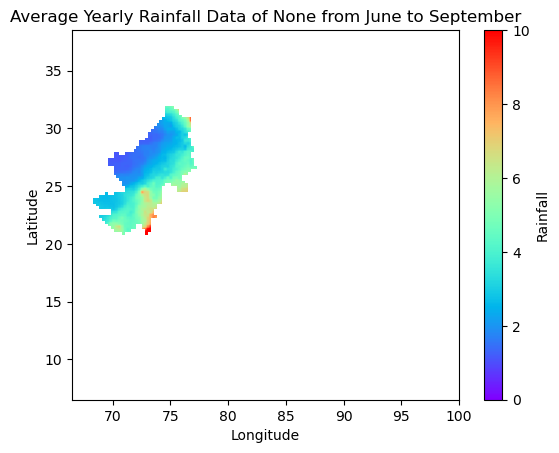

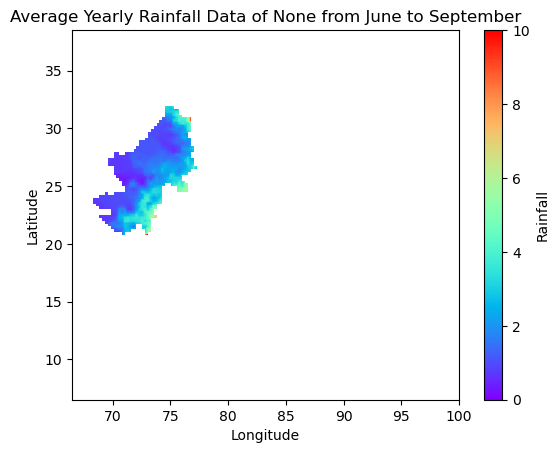

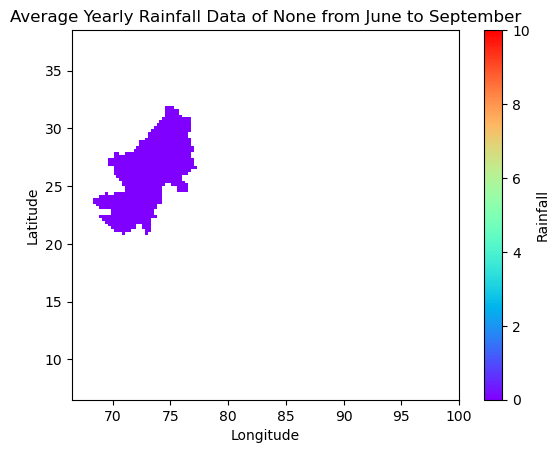

In [8]:
PlotMap(mean_zone1_map)
PlotMap(zone1[0].to_array()[0])
PlotMap(zone1[0].to_array()[0] - mean_zone1_map)

In [9]:
def getCategory(anomaly,mean,std):
    
    anomaly=float(anomaly)
    mean=float(mean)
    std=float(std)
    #print(anomaly)
    
    threshold1 = mean - 2.5*std
    threshold2 = mean - std
    threshold3 = mean - 0.5*std
    threshold4 = mean + 0.5*std
    threshold5 = mean + std
    threshold6 = mean + 2.5*std
    
   

    #Within nearest range of zonal mean rainfall
    if(anomaly< threshold1 ):
        return 1
    #Much lower range of zonal mean rainfall
    elif(anomaly > threshold1 and anomaly < threshold2):
        return 2
    #Slightly lower range of zonal mean rainfall
    elif(anomaly > threshold2 and anomaly < threshold3):
        return 3
    #Within nearest range of zonal mean rainfall
    elif( anomaly > threshold3 and anomaly < threshold4):
        return 4
    #Slightly higher  range of zonal mean rainfall
    elif(anomaly > threshold4 and anomaly < threshold5):
        return 5
    #Much higher range of zonal mean rainfall
    elif(anomaly > threshold5 and anomaly < threshold6):
        return 6
    #Extremely high ranges of zonal mean rainfall
    elif(anomaly > threshold6):
        return 7
    else:
        print(anomaly)

In [10]:
year_category_matrix=[]
zonal_category_matrix=[]

for i in range(len(zone1)):
    zonal_category_matrix.append(getCategory(zone1_anomaly_number[i].to_array(),zone1_mean_number,std_zone1_number))
    zonal_category_matrix.append(getCategory(zone2_anomaly_number[i].to_array(),zone2_mean_number,std_zone2_number))
    zonal_category_matrix.append(getCategory(zone3_anomaly_number[i].to_array(),zone3_mean_number,std_zone3_number))
    zonal_category_matrix.append(getCategory(zone4_anomaly_number[i].to_array(),zone4_mean_number,std_zone4_number))
    zonal_category_matrix.append(getCategory(zone5_anomaly_number[i].to_array(),zone5_mean_number,std_zone5_number))
    zonal_category_matrix.append(getCategory(zone6_anomaly_number[i].to_array(),zone6_mean_number,std_zone6_number))
    year_category_matrix.append(zonal_category_matrix)
    zonal_category_matrix=[]



In [11]:
year_category_matrix

[[1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [1, 1, 2, 1, 1, 1],
 [2, 1, 2, 1, 1, 1],
 [3, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [1, 2, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [1, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1],
 [2, 1, 2, 1, 1, 1],
 [1, 1, 1, 1,

In [12]:
def getValues(anomaly,mean,std):
    anomaly=float(anomaly)
    mean=float(mean)
    std=float(std)
    
    print(mean-(0.5*std)," < " ,anomaly ," < ", mean+(0.5*std))   
    print(mean-(0.5*std)," < ", anomaly ," < ", mean-(1.0*std))    
    print(mean-(1.0*std)," < ", anomaly ," < ", mean-(2.5*std))    
    print(anomaly ," < ", mean-(2.5*std))
    print(mean+(0.5*std) ," < ", anomaly ," < ", mean+(1.0*std))   
    print(mean+(1.0*std) ," < ", anomaly ," < ", mean+(2.5*std))
    print(mean + (2.5*std) ," < ", anomaly)


In [13]:
# for i in range(len(zone1)):
#     zonal_category_matrix.append(getCategory(zone1_anomaly_number[i],zone1_mean_number,std_zone1_number))
#     zonal_category_matrix.append(getCategory(zone2_anomaly_number[i],zone2_mean_number,std_zone2_number))
#     zonal_category_matrix.append(getCategory(zone3_anomaly_number[i],zone3_mean_number,std_zone3_number))
#     zonal_category_matrix.append(getCategory(zone4_anomaly_number[i],zone4_mean_number,std_zone4_number))
#     zonal_category_matrix.append(getCategory(zone5_anomaly_number[i],zone5_mean_number,std_zone5_number))
#     zonal_category_matrix.append(getCategory(zone6_anomaly_number[i],zone6_mean_number,std_zone6_number))
#     year_category_matrix.append(zonal_category_matrix)
#     zonal_category_matrix=[]

getValues(zone1_anomaly_number[0].to_array(),zone1_mean_number,std_zone1_number)

2.7967002362324855  <  -1.6315346654274407  <  4.429219413369539
2.7967002362324855  <  -1.6315346654274407  <  1.9804406476639584
1.9804406476639584  <  -1.6315346654274407  <  -0.46833811804162284
-1.6315346654274407  <  -0.46833811804162284
4.429219413369539  <  -1.6315346654274407  <  5.245479001938066
5.245479001938066  <  -1.6315346654274407  <  7.694257767643648
7.694257767643648  <  -1.6315346654274407


In [14]:
for i in range(len(zone1_anomaly_number)):
    print(float(zone1_anomaly_number[i].to_array()))

-1.6315346654274407
-0.5679225294636756
0.16892015575234856
-1.3318616588317715
-1.407469232827521
0.1054040500541694
-0.02759400260062873
1.747117409736573
1.0148601293473136
0.40497939346419815
-1.9496067280720117
0.40478547989940683
-0.03367796839927389
0.5563812236120625
-2.087668329596609
0.9992480712693421
2.7927798543649365
-2.310865163148546
0.08073931657235381
-0.6513324788250884
0.06646780159618651
-0.2049965620936418
-0.621558589720158
0.4509983583826849
-0.9674337714390358
1.4618598805659624
0.8043021164783558
-0.5635660923061842
-0.5649618949264615
-0.34516189972939226
0.2098646410397562
-0.3186905980905291
1.476118224157484
0.3313235308638538
-0.10514298884598126
-0.6851808890904015
0.31093617263910034
-1.0550794790211613
-1.7727918715957824
-0.5751810696268522
-0.5678112015235068
0.7597312506333492
0.08498511905181813
1.6181530760447627
1.2051269609688455
0.17385484435896773
0.0024165799315999784
-1.0178544721763814
-0.2995375720520072
0.6533281647045834
-1.5716741093112

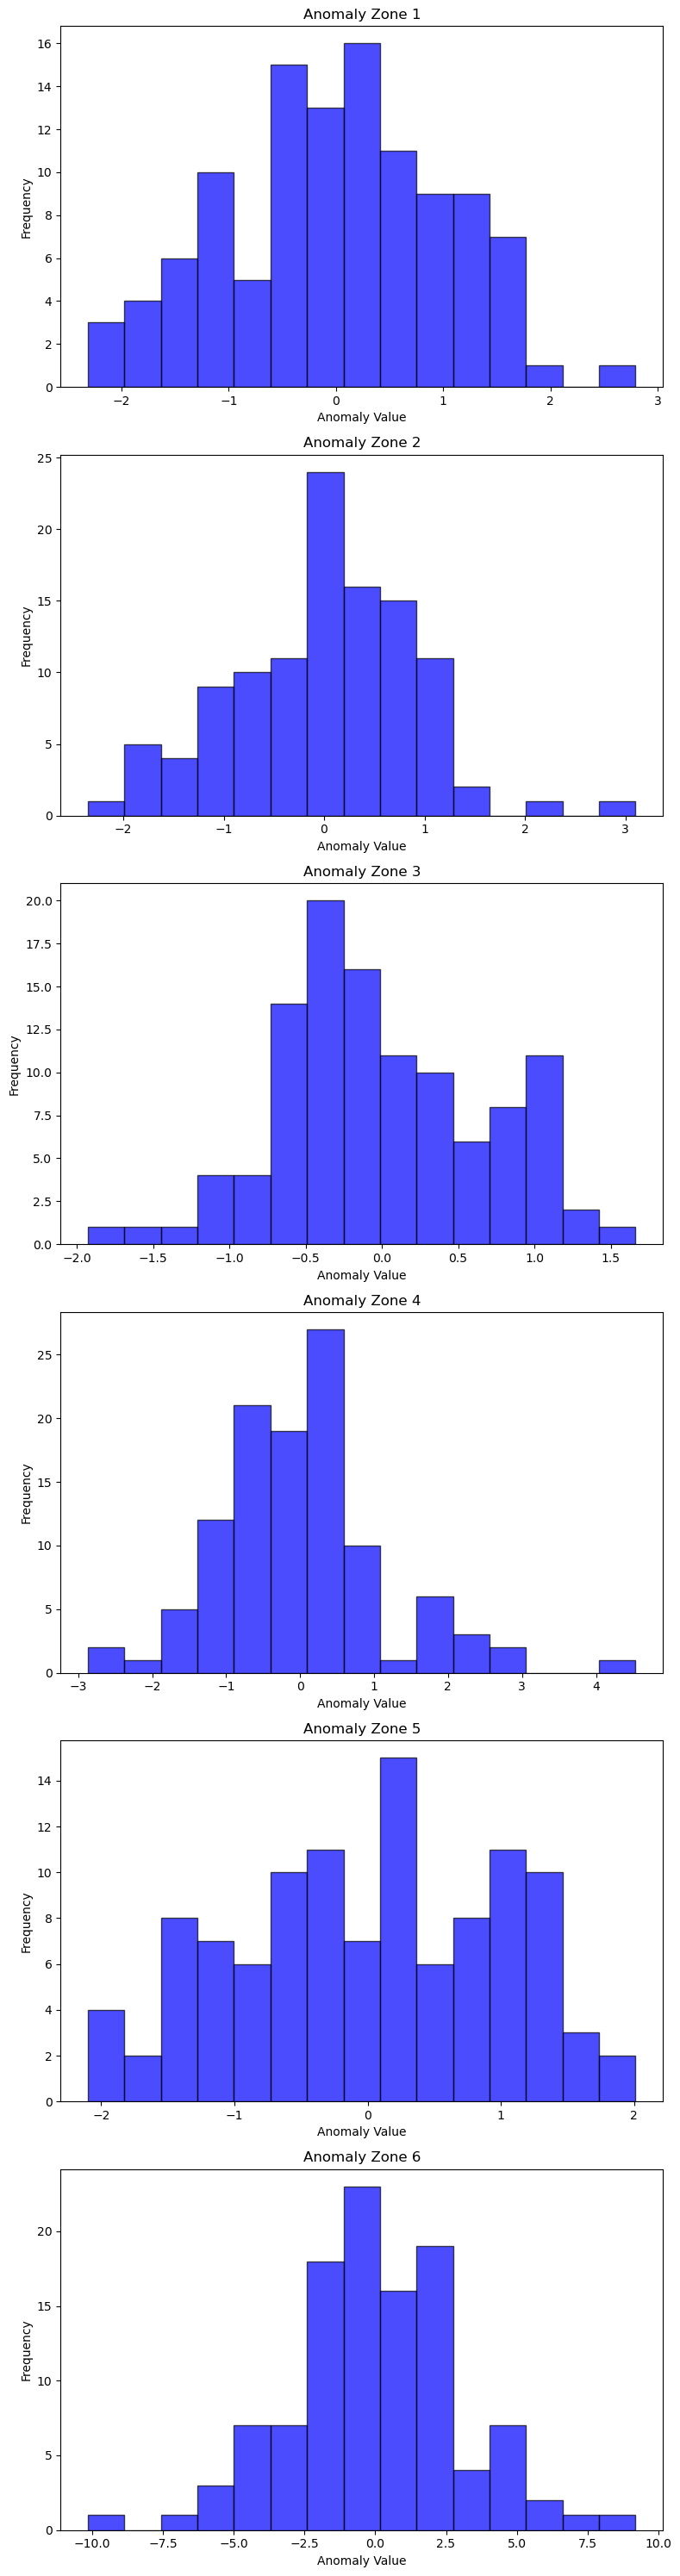

In [22]:
values1 = [float(zone1_anomaly_number[i]['__xarray_dataarray_variable__']) for i in range(len(zone1_anomaly_number))]
values2 = [float(zone2_anomaly_number[i]['__xarray_dataarray_variable__']) for i in range(len(zone1_anomaly_number))]
values3 = [float(zone3_anomaly_number[i]['__xarray_dataarray_variable__']) for i in range(len(zone1_anomaly_number))]
values4 = [float(zone4_anomaly_number[i]['__xarray_dataarray_variable__']) for i in range(len(zone1_anomaly_number))]
values5 = [float(zone5_anomaly_number[i]['__xarray_dataarray_variable__']) for i in range(len(zone1_anomaly_number))]
values6 = [float(zone6_anomaly_number[i]['__xarray_dataarray_variable__']) for i in range(len(zone1_anomaly_number))]


fig, axs = plt.subplots(6, 1, figsize=(8, 30))

# Loop through each subplot and plot histograms
zones = [values1, values2, values3, values4, values5, values6]

for i, ax in enumerate(axs):
    hist, bins, _ = ax.hist(zones[i], bins=15, color='blue', alpha=0.7, edgecolor='black')
    ax.set_title(f"Anomaly Zone {i+1}")
    ax.set_xlabel("Anomaly Value")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()




In [33]:
#Converting the cattegory matrix to a pandas dataFrame
column_labels = ['zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone6']
df = pd.DataFrame(year_category_matrix, columns=column_labels)
df

,zone1,zone2,zone3,zone4,zone5,zone6
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,2,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
105,2,1,1,1,1,1
106,2,1,2,1,1,1
107,2,1,1,1,1,1
108,1,1,1,1,1,1


In [34]:
#Storing the dataFrame
df.to_csv('Rain Category.csv')